In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from numpy import *
import numpy as np
import gillespy2
from sdeint import *
from numba import jit


In [4]:

def tauNspecies(t, X, N, K, r, alpha, tau):
    # Time steps
    ta = [0]

    # Set up initial condition for each population
    # List of lists - each population is a list item
    # Each population list Xa[i][j] is the population i size at ta[j]
    Xa = list()
    for pop in X:
        Xa.append([pop])

    # Xa = [[50], [200], [350]]
    # Xa[0] = [50]
    # Xa[0][0] = 50
    t_current = 0
    step_idx = 0
    while (t_current < t):

        for pop_i in range(N):
            birth_rate = r[pop_i] * Xa[pop_i][step_idx]
            death_rate = 0
            for pop_j in range(N):
                death_rate += (r[pop_i] * Xa[pop_i][step_idx]) * (alpha[pop_i, pop_j] * Xa[pop_j][step_idx] / K[pop_i])
            population_change = (np.random.poisson(birth_rate * tau, 1) -
                                 np.random.poisson(death_rate * tau, 1))[0]
            new_size = Xa[pop_i][step_idx] + population_change
            if new_size >= 0:
                Xa[pop_i].append(new_size)
            else:
                Xa[pop_i].append(0)

        step_idx += 1
        t_current += tau
        ta.append(t_current)

    #ta = [t + T_init for t in ta]
    return(ta, Xa)

#create params
N = 3
t = 100 # max time, starting from zero
tau = 0.01 # time step size
X = [750, 900, 1250] # initial population sizes
K = [1500, 1500, 1500] # carrying capacities
r = [1, 1, 1] # growth rates
# Competition - must have '1' on the diagonal
alpha = array([[1, 0.5, 0.4], [0.4, 1, 0.63], [1.2, 0, 1]])
ta, Xa = tauNspecies(t, X, N, K, r, alpha, tau)


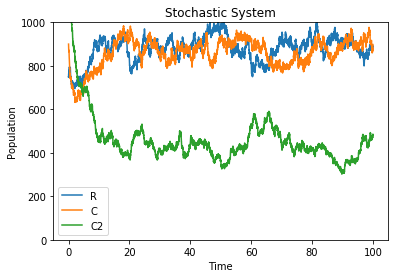

In [5]:
def plottau():
    N = 3
    t = 100 # max time, starting from zero
    tau = 0.01 # time step size
    X = [750, 900, 1250] # initial population sizes
    K = [1500, 1500, 1500] # carrying capacities
    r = [1, 1, 1] # growth rates
    # Competition - must have '1' on the diagonal
    alpha = array([[1, 0.5, 0.4], [0.4, 1, 0.63], [1.2, 0, 1]])
    ta, Xa = tauNspecies(t, X, N, K, r, alpha, tau)
    
    for pop in Xa:
        plt.plot(ta, pop)
        plt.ylim(0,1000)
        plt.legend(['R', 'C','C2','C3','C4'])

    
    
    plt.title('Stochastic System')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.legend(['R', 'C', 'C2'])
plottau()
